In [171]:
import pandas as pd
import numpy as np

In [172]:
dt1 = pd.read_csv('Attrition Rate Analysis.csv')

In [173]:
dt1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [174]:
dt1 = dt1.dropna()

In [175]:
dt1 = dt1.drop_duplicates()

In [176]:
dt1 = dt1.drop(['EmployeeID', 'Over18'], axis=1)

In [177]:
dt1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x2069338be20>,
 'caps': [<matplotlib.lines.Line2D at 0x206933983a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2069338bb80>],
 'medians': [<matplotlib.lines.Line2D at 0x206933988e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20693398b80>],
 'means': []}

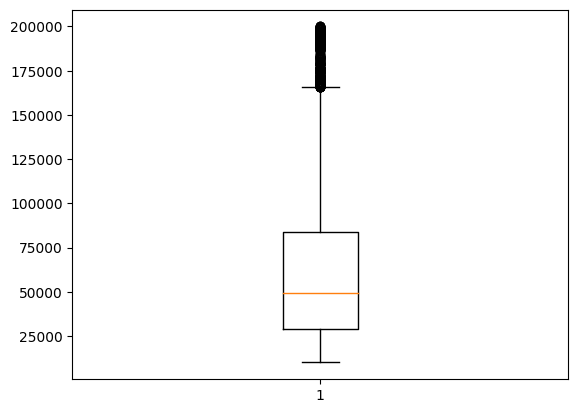

In [178]:
import matplotlib.pyplot as plt
plt.boxplot(dt1.MonthlyIncome)

{'whiskers': [<matplotlib.lines.Line2D at 0x206933b7940>,
 'caps': [<matplotlib.lines.Line2D at 0x206933b7e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x206933b76a0>],
 'medians': [<matplotlib.lines.Line2D at 0x206933d4400>],
 'fliers': [<matplotlib.lines.Line2D at 0x206933d46a0>],
 'means': []}

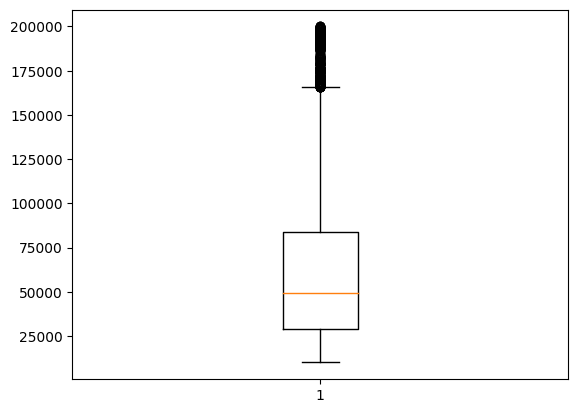

In [179]:
#plot is positively skewed
plt.boxplot(dt1.MonthlyIncome)

{'whiskers': [<matplotlib.lines.Line2D at 0x206933f3940>,
 'caps': [<matplotlib.lines.Line2D at 0x206933f3e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x206933f36a0>],
 'medians': [<matplotlib.lines.Line2D at 0x20693418400>],
 'fliers': [<matplotlib.lines.Line2D at 0x206934186a0>],
 'means': []}

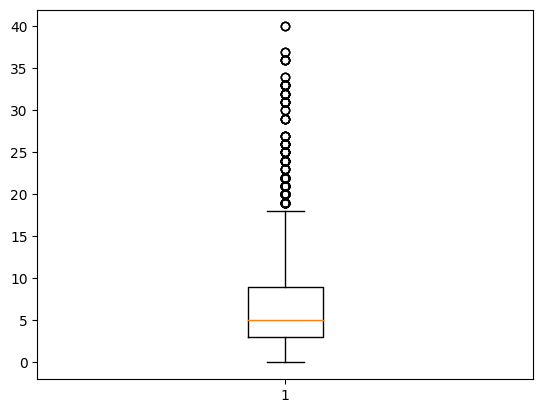

In [180]:
plt.boxplot(dt1.YearsAtCompany)

In [181]:
#import logistic regression
import statsmodels.api as sm
Y = dt1.Attrition
X = dt1[['Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [182]:
from sklearn import preprocessing

In [183]:
label_encoder=preprocessing.LabelEncoder()

In [184]:
dt1['Attrition'] = label_encoder.fit_transform(dt1['Attrition'])

In [185]:
dt1['BusinessTravel'] = label_encoder.fit_transform(dt1['BusinessTravel'])

In [186]:
dt1['Department'] = label_encoder.fit_transform(dt1['Department'])

In [187]:
dt1['EducationField'] = label_encoder.fit_transform(dt1['EducationField'])

In [188]:
dt1['Gender'] = label_encoder.fit_transform(dt1['BusinessTravel'])

In [189]:
dt1['JobRole'] = label_encoder.fit_transform(dt1['JobRole'])

In [190]:
dt1['MaritalStatus'] = label_encoder.fit_transform(dt1['MaritalStatus'])

In [191]:
import statsmodels.api as sm
Y = dt1.Attrition


In [192]:
X = dt1[['Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [193]:
X1 = sm.add_constant(X)
# Logistic=sm.Logit(Y,X1)
# result = Logistic.fit()

In [194]:
Logistic=sm.Logit(Y,X1)

In [195]:
result = Logistic.fit()

Optimization terminated successfully.
         Current function value: 0.393020
         Iterations 7


In [196]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4382
Model:                          Logit   Df Residuals:                     4363
Method:                           MLE   Df Model:                           18
Date:                Thu, 23 Mar 2023   Pseudo R-squ.:                  0.1091
Time:                        16:33:10   Log-Likelihood:                -1722.2
converged:                       True   LL-Null:                       -1933.1
Covariance Type:            nonrobust   LLR p-value:                 2.731e-78
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                        -0.0308      0.008     -3.658      0.000      -0.047      -0.014
BusinessTravel             -0.0077   2.03e+06  -3.82e-09      1.000   -3.97e+06    3.97e+06
Department                 -0.2230      0.079     -2.806      0.005      -0.379      -0.067
DistanceFromHome           -0.0015      0.005     -0.285      0.776      -0.012       0.009
Education                  -0.0665      0.039     -1.721      0.085      -0.142       0.009
EducationField             -0.0958      0.020     -4.871      0.000      -0.134      -0.057
EmployeeCount               0.0014   1.02e+16    1.4e-19      1.000      -2e+16       2e+16
Gender                     -0.0077   2.03e+06  -3.82e-09      1.000   -3.97e+06    3.97e+06
JobLevel                   -0.0301      0.039     -0.769      0.442      -0.107       0.047
JobRole                     0.0402      0.018      2.216      0.027       0.005       0.076
MaritalStatus               0.5826      0.062      9.384      0.000       0.461       0.704
MonthlyIncome           -1.798e-06   9.53e-07     -1.886      0.059   -3.67e-06    7.03e-08
NumCompaniesWorked          0.1164      0.018      6.514      0.000       0.081       0.151
PercentSalaryHike           0.0130      0.012      1.120      0.263      -0.010       0.036
StandardHours               0.0114   1.27e+15   8.98e-18      1.000    -2.5e+15     2.5e+15
StockOptionLevel           -0.0678      0.054     -1.258      0.208      -0.173       0.038
TotalWorkingYears          -0.0585          0       -inf      0.000      -0.059      -0.059
TrainingTimesLastYear      -0.1451        nan        nan        nan         nan         nan
YearsAtCompany              0.0130      0.017      0.744      0.457      -0.021       0.047
YearsSinceLastPromotion     0.1327      0.021      6.459      0.000       0.092       0.173
YearsWithCurrManager       -0.1390      0.022     -6.368      0.000      -0.182      -0.096
===========================================================================================
"""

In [197]:
# variables P<0.05 are important variables
# 1/1+ e^(-.03 + (.02).........)
#proceed for random Forest(use to identify important independent variaBLES),  above is a classification technique

In [198]:
from sklearn.ensemble import RandomForestClassifier

In [199]:
rf_model = RandomForestClassifier(n_estimators=1000,max_features=2,oob_score=True)

In [200]:
# perform the independent variable
features = dt1[['Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]  

In [201]:
rf_model.fit(X=features,y=dt1["Attrition"])

RandomForestClassifier(max_features=2, n_estimators=1000, oob_score=True)

In [202]:
print(rf_model.oob_score_)

1.0


In [203]:
for feature,imp in zip(features,rf_model.feature_importances_):
    print(feature,imp)
    
#     output of random forest find imp variable

Age 0.0973504679521129
BusinessTravel 0.020654380304610913
Department 0.025385237460613833
DistanceFromHome 0.06998578421245041
Education 0.04189455889213706
EducationField 0.04198566907670977
EmployeeCount 0.0
Gender 0.020644491834680336
JobLevel 0.038282168382215466
JobRole 0.056219398063970714
MaritalStatus 0.03948534932589266
MonthlyIncome 0.09313178568080996
NumCompaniesWorked 0.05720985156924741
PercentSalaryHike 0.06556574222756316
StandardHours 0.0
StockOptionLevel 0.03484305301430717
TotalWorkingYears 0.08615095697955587
TrainingTimesLastYear 0.044890234454231
YearsAtCompany 0.06884833890184722
YearsSinceLastPromotion 0.04333843264416988
YearsWithCurrManager 0.05413409902287408


In [204]:
# distfromhome,age,totalworkingyear,yearatcompany,monthly_income
var=['Age', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears']

In [205]:
# pass this input to decision tree
from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier 


In [206]:
tree_model = tree.DecisionTreeClassifier()

In [207]:
predictors = pd.DataFrame([dt1["Age"], dt1["DistanceFromHome"],dt1["MonthlyIncome"],dt1["TotalWorkingYears"]]).T

In [208]:
tree_model =  tree.DecisionTreeClassifier(max_depth=8)

In [209]:
tree_model.fit(X=predictors, y=dt1["Attrition"])

DecisionTreeClassifier(max_depth=8)

In [211]:
with open("DT.dot", 'w') as f:
    f = tree.export_graphviz(tree_model,feature_names=["Age","DistanceFromHome","MonthlyIncome", "TotalWorkingYear"], out_file=f)